### Oracle ADS - Credit Card Fraud Detection


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [98]:
#https://docs.oracle.com/en-us/iaas/tools/ads-sdk/latest/user_guide/overview/overview.html

In [10]:
#!pip install oracle-ads

In [1]:
import ads
import logging
import pandas as pd
import numpy as np
import warnings

from ads.dataset.dataset_browser import DatasetBrowser
from ads.dataset.factory import DatasetFactory
from os import path
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.dataset.factory import DatasetFactory
import ads

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

In [2]:
path = 'input/creditcard.csv'
ds = DatasetFactory.open(path, target="Class").set_positive_class(0)


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
ds.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,True
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,True
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,True


In [4]:
ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


True     284315
False       492
Name: Class, dtype: int64

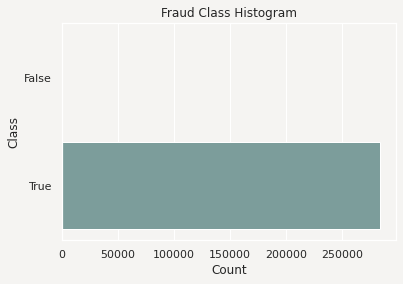

In [6]:
travel_plot = ds['Class'].ads.feature_plot()
travel_plot.set_title("Fraud Class Histogram")
ds['Class'].value_counts()

True     284315
False       492
Name: Class, dtype: int64

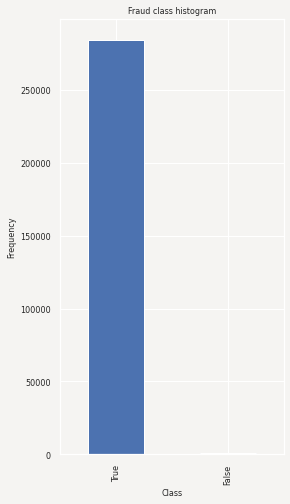

In [33]:
import matplotlib.pyplot as plt
pd.value_counts(ds['Class']).plot.bar()
plt.title('Fraud class histogram',fontsize=8)
plt.xlabel('Class',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["figure.figsize"] = (6,8)
plt.legend('',frameon=False)
ds['Class'].value_counts()

<a id='trans'></a>
## Getting and Applying Transformation Recommendations

`ADS` can help with feature engineering by transform datasets. For example, it can fix class imbalance by up or downsampling. There are many transforms that `ADS` can also apply. You can have `ADS` perform an analysis of the data and automatically perform the transformations that it thinks would improve the model. This is done using the `auto_transform()` method. The `suggest_recommendations()` method allows you to explore the suggested transforms using the notebook's UI and select the transformations that you want it to make.

All `ADS` datasets are immutable, any transforms that are applied result in a new dataset. In this example, the notebook performs automatic transformations on the data and it also fixes the class imbalance.

In [8]:
ds.suggest_recommendations()

Code
Message                  Variables Suggested  Action                                    
Imbalanced Target(0.16%) Class     Do nothing Do nothing                                
                                              Down-sample                 .down_sample()
                                              Up-sample    .up_sample(sampler='default')

In [9]:
ds_balanced_large = ds.up_sample()

1    284315
0    284315
Name: Class, dtype: int64

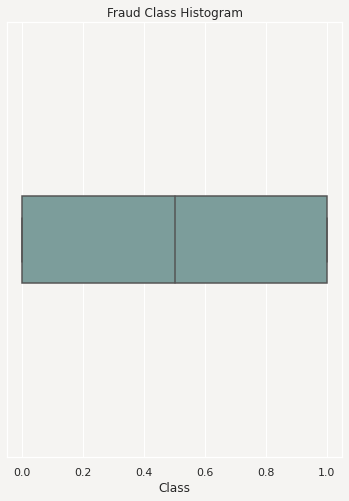

In [34]:
ds_plot = ds_balanced_large['Class'].ads.feature_plot()
ds_plot.set_title("Fraud Class Histogram")
ds_balanced_large['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

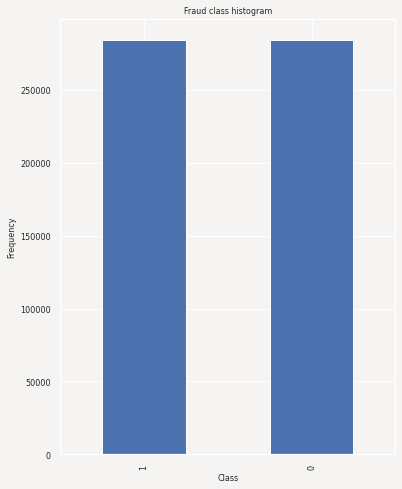

In [35]:
import matplotlib.pyplot as plt
pd.value_counts(ds_balanced_large['Class']).plot.bar()
plt.title('Fraud class histogram',fontsize=8)
plt.xlabel('Class',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["figure.figsize"] = (2,3)
plt.legend('',frameon=False)
ds_balanced_large['Class'].value_counts()

In [12]:
ds_balanced_large.set_target('Class')
ds_balanced_large.set_positive_class(1)
ds_balanced_large.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1


In [15]:
train,test = ds_balanced_large.train_test_split()


Train Data
Shape of X:(511767, 30)
Shape of y:(511767,)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_classifier = Pipeline(steps=[
  ('clf', LogisticRegression())
])

pipeline_classifier.fit(train.X, train.y)

Pipeline(steps=[('clf', LogisticRegression())])

In [44]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.rcParams["figure.figsize"] = (4,8)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 98.30190449385496%


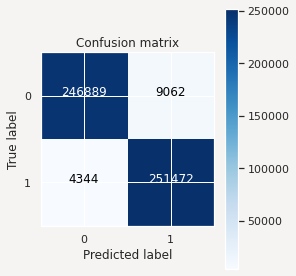

In [45]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

y_train_pre = pipeline_classifier.predict(train.X)
cnf_matrix_tra = confusion_matrix(train.y, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 98.18941015474228%


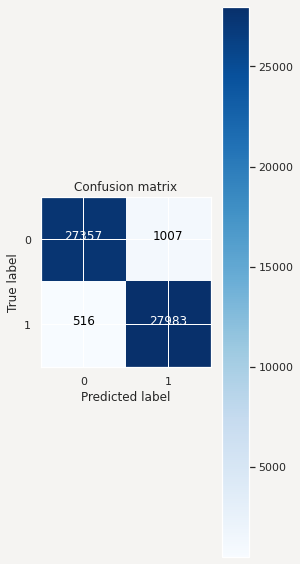

In [55]:
y_pre = pipeline_classifier.predict(test.X)

cnf_matrix = confusion_matrix(test.y, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()

plt.rcParams["figure.figsize"] = (1,3)
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [57]:
tmp = pipeline_classifier.fit(train.X, train.y.ravel())

In [58]:
y_pred_sample_score = tmp.decision_function(test.X)

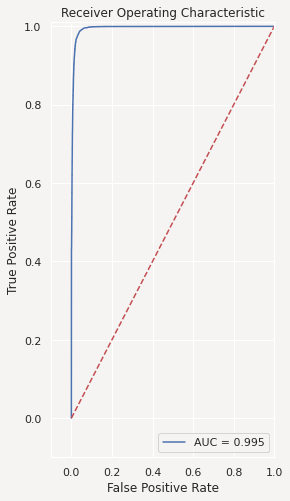

In [59]:
fpr, tpr, thresholds = roc_curve(test.y, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()